# PREDICTION OF TITANIC SURVIVAL

By Nnamdi Nwankwo

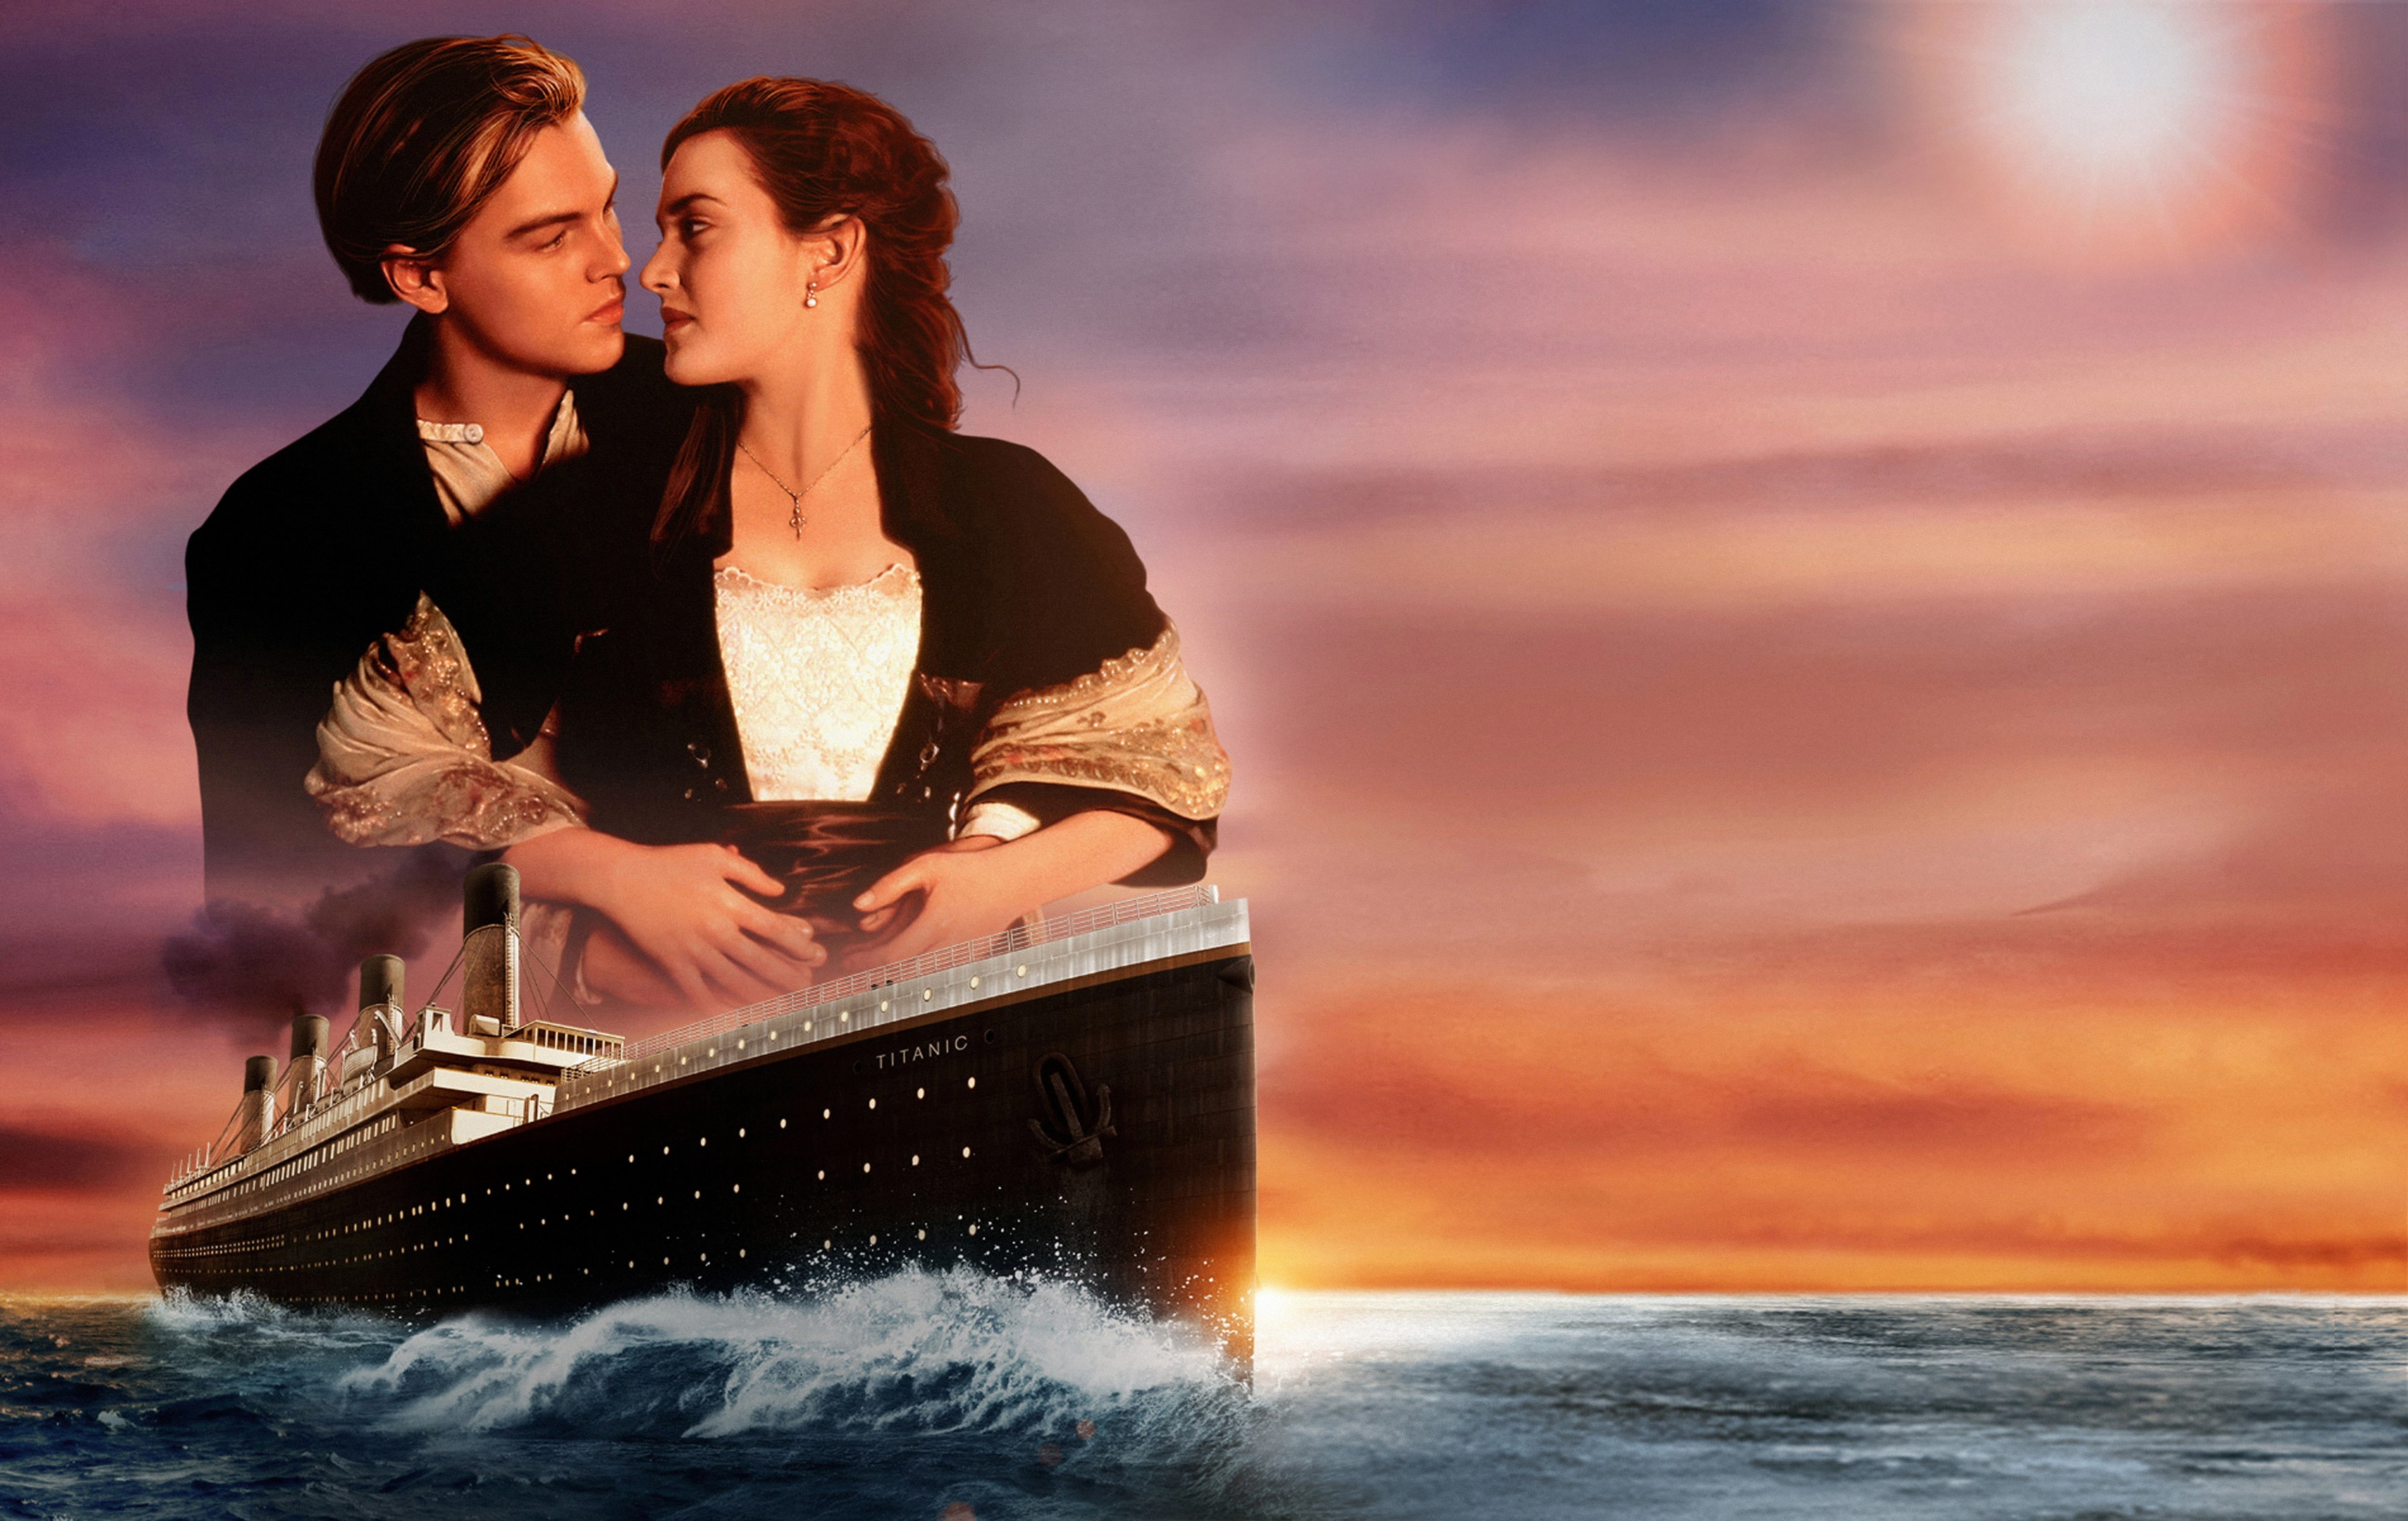

# Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912,
during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224
passengers and crew. This sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats
for the passengers and crew. Although there was some element of luck involved in surviving the sinking,

some groups of people were more likely to survive than others, such as women, children, and the upper-
class

# About Dataset
The data has been split into two groups:
training set (train.csv) and test set (test.csv)

The training set contains the outcome (also known as the “ground truth”) for each passenger and will be used to build machine learning models

The test set will be used to see how well the model performs on unseen data. The test set will be used to predict the outcomes. For each passenger, The trained model will be used to predict whether or not they survived the sinking of the Titanic.

In these datasets we were provided with the following variables:-

survival:- 0 = No, 1 = Yes

pclass (Ticket class):- 1 = 1st, 2 = 2nd, 3 = 3rd 

sex:- Sex

Age:- Age in years

sibsp:-# of siblings / spouses aboard the Titanic

parch:- # of parents / children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked(Port of Embarkation):- C = Cherbourg, Q = Queenstown, S = Southampton

# Objective

To predict whether a person will be saved from sinking or not

To determine the groups of people that were most likely to survive than others

# Importing the required Libraries

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#dealing with warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [354]:
RMS_train = pd.read_csv(r"C:\Users\CELEBOBO COMPUTERS\Downloads\train (3).csv")
RMS_test = pd.read_csv(r"C:\Users\CELEBOBO COMPUTERS\Downloads\test (2).csv")

In [355]:
RMS_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
RMS_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [357]:
RMS_train.shape

(891, 12)

In [358]:
RMS_test.shape

(418, 11)

In [359]:
#Making a copy of the train data
RMS_train2=RMS_train.copy()

# Data Validation

In [360]:
RMS_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [361]:
RMS_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [362]:
RMS_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [363]:
RMS_train.duplicated().sum()

0

# Exploratory Data Analysis

# i.Distribution of Categorical Variables


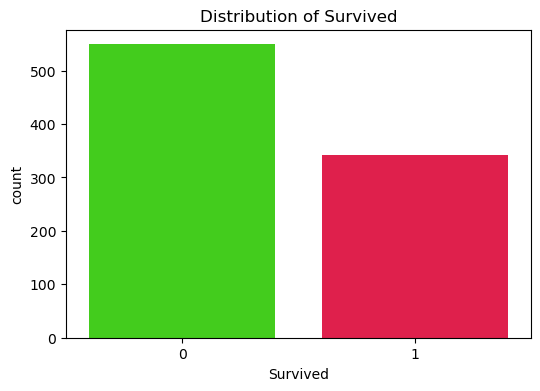

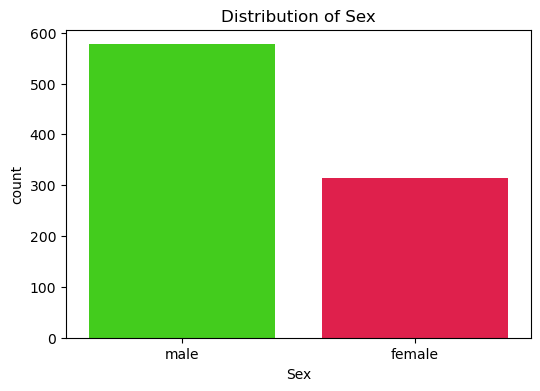

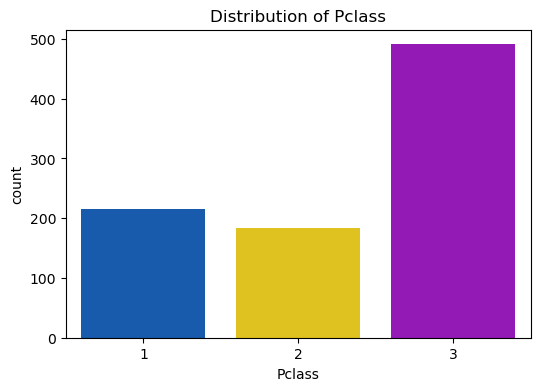

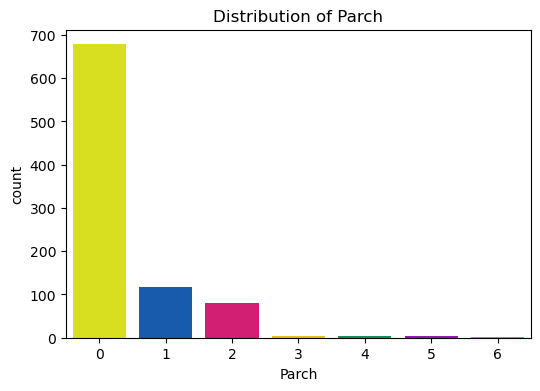

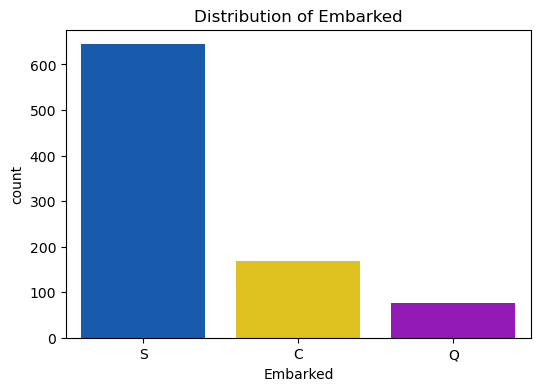

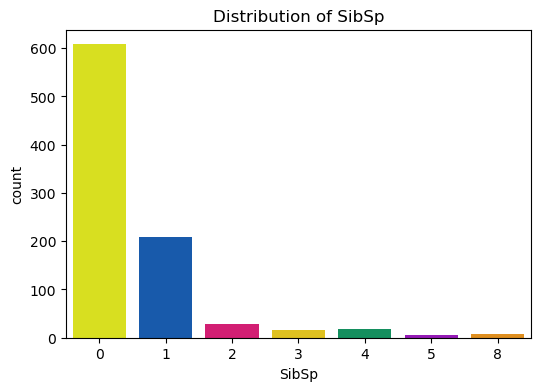

In [364]:
RMS_cat = ["Survived", "Sex", "Pclass", "Parch", "Embarked", "SibSp"]
for i in RMS_cat:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=RMS_train, x=i, palette='prism')
    plt.title(f"Distribution of {i}")
    plt.show()


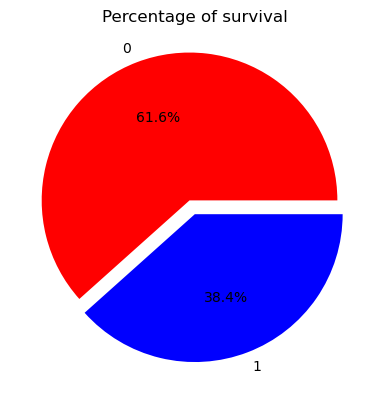

In [365]:
#Percentage of dead and Survived passengers
colors = ['red','blue']
plt.title('Percentage of survival')
RMS_train["Survived"].value_counts().plot(kind='pie', ylabel ='', explode=[0.1,0], colors=colors, autopct='%1.1f%%')
plt.show()

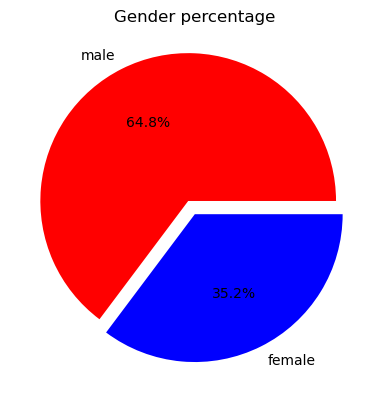

In [366]:
#Percentage of Gender
colors = ['red','blue']
plt.title('Gender percentage')
RMS_train["Sex"].value_counts().plot(kind='pie', ylabel='', explode=[0.1,0], colors=colors, autopct='%1.1f%%')
plt.show()

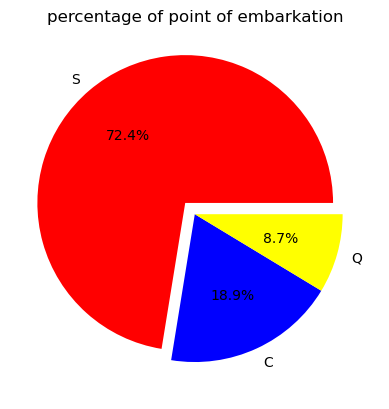

In [367]:
#Percentage of point of embarkation
colors = ['red','blue', 'yellow']
plt.title('percentage of point of embarkation')
RMS_train["Embarked"].value_counts().plot(kind='pie', ylabel ='', explode=[0.1,0, 0], colors=colors, autopct='%1.1f%%')
plt.show()

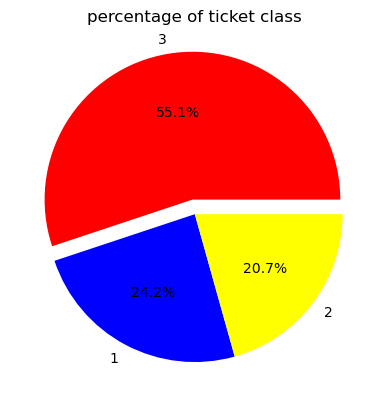

In [368]:
#Percentage of ticket class
colors = ['red','blue', 'yellow']
plt.title('percentage of ticket class')
RMS_train["Pclass"].value_counts().plot(kind='pie', ylabel ='', explode=[0.1,0, 0], colors=colors, autopct='%1.1f%%')
plt.show()

From the Plots above, the following findings have been derived:-

A greater number of passengers(61.6%) didn't survive the shipwreck

There are more males(64.8%) aboard the titanic ship

Majority of the passengers(72.4%) embarked from Southampton while Queenstown has the lowest number of passengers(8.7%)

The Third class ticket has the higher number of passengers(55.1%)

There are more people travelling alone compared to those travelling with parents, siblings and spouse

# ii Distribution of the Numerical Variables

<AxesSubplot:xlabel='Age', ylabel='Density'>

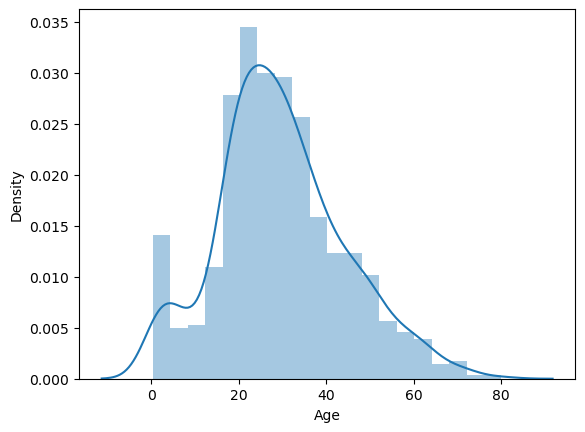

In [369]:
#Age Distribution
sns.distplot(RMS_train["Age"])

Individuals of ages 20-40 accounted for the greater number of passengers

<AxesSubplot:xlabel='Fare', ylabel='Density'>

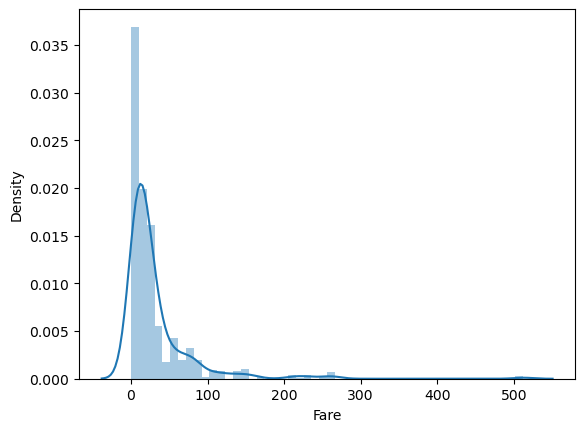

In [370]:
#Fare Distribution
sns.distplot(RMS_train["Fare"])

The Fare showed a negatively skewed distribution; therefore we should apply log transformation to make the distribution more assymetrical for better interpretation and model assumption

In [371]:
RMS_train['Fare'] = np.log(RMS_train['Fare']+1)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

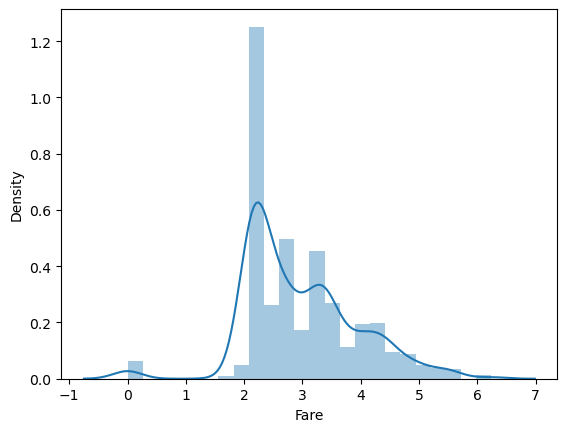

In [372]:
sns.distplot(RMS_train["Fare"])

# iii Survival Analysis

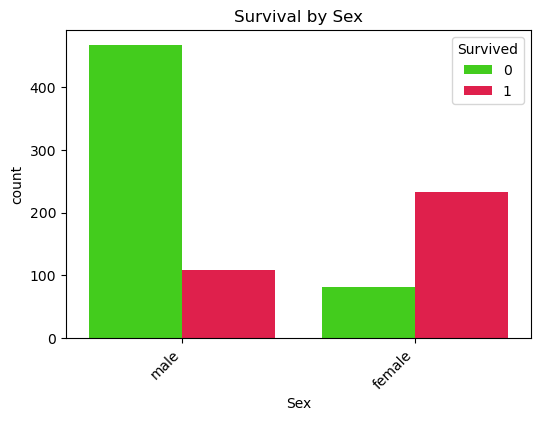

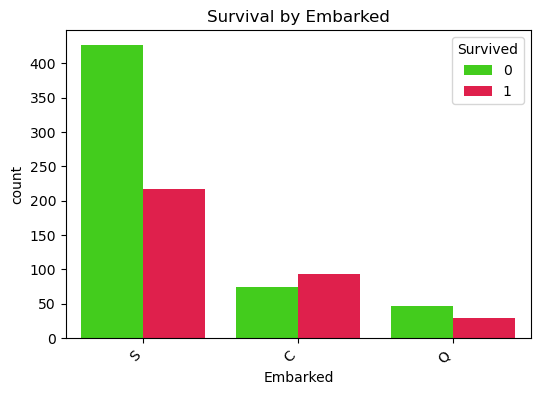

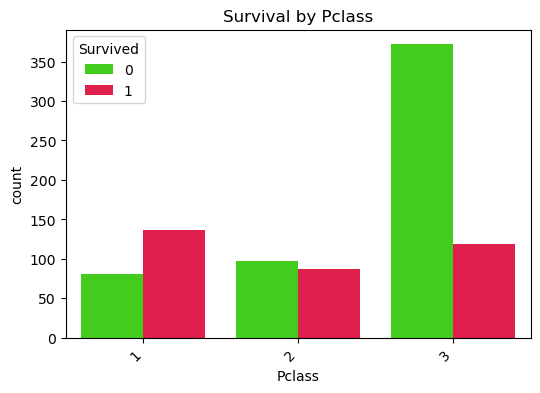

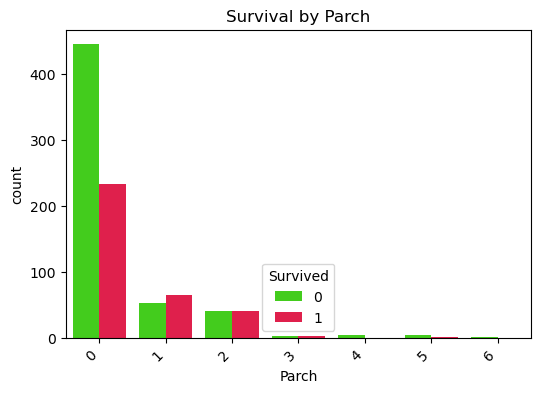

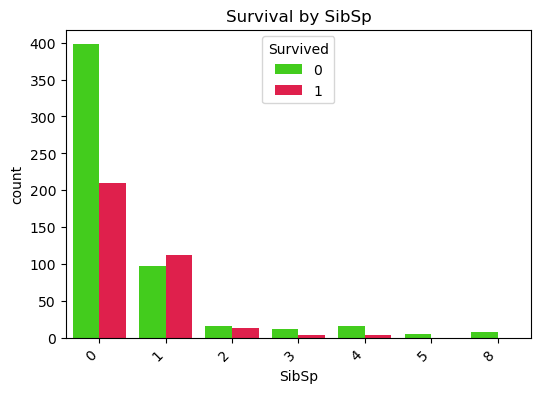

In [373]:
Cat_Colms = ["Sex", "Embarked", "Pclass", "Parch", "SibSp"]
for i in Cat_Colms:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=RMS_train, x=i, hue="Survived", palette='prism')
    plt.title(f"Survival by {i}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

Text(0.5, 1.0, 'Survival by Age')

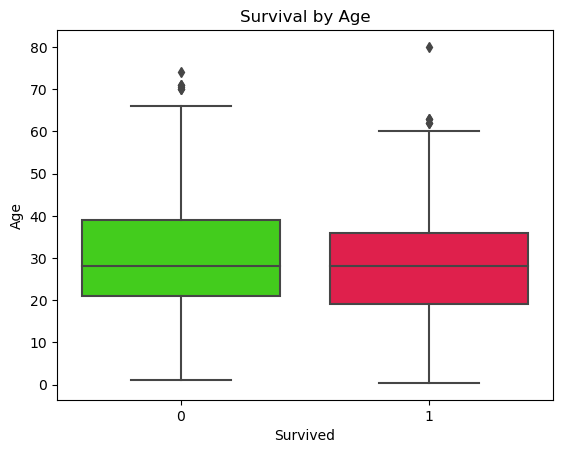

In [374]:
#Survival by Age
sns.boxplot(data=RMS_train, y='Age', x="Survived", palette='prism')
plt.title('Survival by Age')

Insights from the survival Analysis:- 

The females were most likely to survive than the males 

Majority of the passengers embarked from Southampton and that's where most deaths were recorded

Most deaths occurred in the lower class. The upper class were the most likely to survive 

Most deaths occurred among the solo passengers as they accounted for greater number of passengers aboard the Titanic

Passengers of ages 20 and below were more likely to survive, while most deaths were recorded among passengers of Ages 28-40

# Data Pre-Processing

In [375]:
#Combining the train and test data for analysis
Titanic_data = pd.concat([RMS_train, RMS_test], axis=0)
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S


In [376]:
Titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [377]:
Titanic_data.shape

(1309, 12)

In [378]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [379]:
#checking for null values
Titanic_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [380]:
#Replacing the missing values of the numerical and categorical columns with mean and mode of the columns

#Calculate the mean and mode of the columns
mean_A = Titanic_data['Age'].mean()
mean_B = Titanic_data['Fare'].mean()
mode_A = Titanic_data['Embarked'].mode()[0]

#Replace NaN values in the 'A' column with the mean
Titanic_data['Age'] = Titanic_data['Age'].fillna(mean_A)
Titanic_data['Fare'] = Titanic_data['Fare'].fillna(mean_B)
Titanic_data['Embarked'] = Titanic_data['Embarked'].fillna(mode_A)

Titanic_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,29.881138,1,1,2668,22.3583,NaN,C


In [381]:
Titanic_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

<AxesSubplot:>

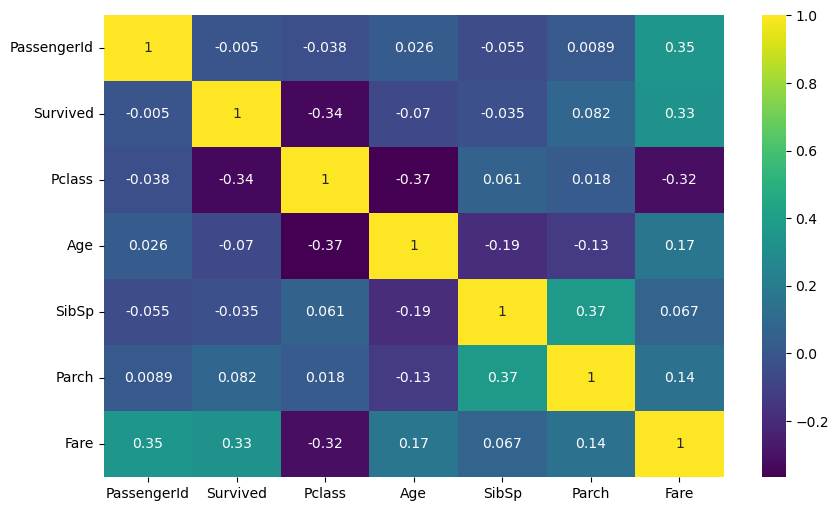

In [382]:
#Showing the correlation in the numerical features
plt.figure(figsize=(10,6))
sns.heatmap(Titanic_data.corr(), annot=True, cmap='viridis')


Pclass and Fare showed a stronger correlation with Survival outcome and are most important in determining Survival outcome 

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

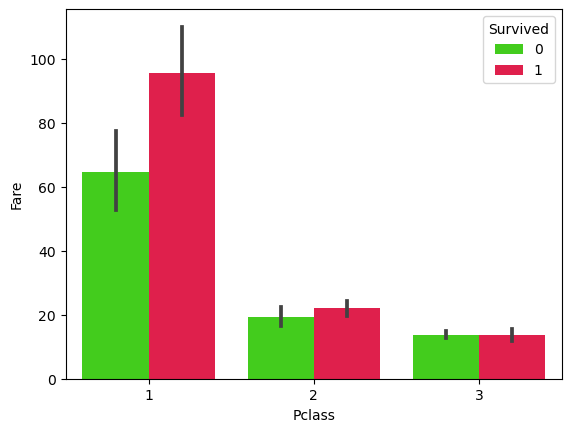

In [383]:
#Plotting the relationship with Pclass, Fare and Survival outcome
sns.barplot(data=RMS_train2, x='Pclass', y='Fare', hue='Survived', palette='prism')


The higher the fare, the higher the class; and the higher the class, the greater chance of survival

In [384]:
#droping the columns that are not needed
Titanic_data=Titanic_data.drop(["Cabin", "Name", "Ticket"], axis=1)
Titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


# Model Building and Machine Learning

# i Label Encoding

In [385]:
# Initialize LabelEncoder for the categorical columns
label_encoder_Sex = LabelEncoder()
label_encoder_Embarked = LabelEncoder()

# Apply label encoding to the columns
Titanic_data['Sex'] = label_encoder_Sex.fit_transform(Titanic_data['Sex'])
Titanic_data['Embarked'] = label_encoder_Embarked.fit_transform(Titanic_data['Embarked'])

Titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# Normalization

In [386]:
#Scaling the data/Normalization

scaler = MinMaxScaler()


features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for feature in features:
    Titanic_data[feature] = scaler.fit_transform(Titanic_data[[feature]])

Titanic_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.004119,1.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.008355,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.004272,1.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.007790,1.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.004300,1.0


# ii Training and Testing Split

In [387]:
Train_data=Titanic_data.iloc[: 891]
Test_data=Titanic_data.iloc[891:]
Train_data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,0.0,0.5,1.0,0.336089,0.000,0.000000,0.005151,1.0
887,888,1.0,0.0,0.0,0.235876,0.000,0.000000,0.006703,1.0
888,889,0.0,1.0,0.0,0.372180,0.125,0.222222,0.006239,1.0
889,890,1.0,0.0,1.0,0.323563,0.000,0.000000,0.006703,0.0
890,891,0.0,1.0,1.0,0.398722,0.000,0.000000,0.004234,0.5


In [388]:
Test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,1.0,1.0,0.430039,0.000,0.000000,0.015282,0.5
1,893,NaN,1.0,0.0,0.586622,0.125,0.000000,0.013663,1.0
2,894,NaN,0.5,1.0,0.774521,0.000,0.000000,0.018909,0.5
3,895,NaN,1.0,1.0,0.336089,0.000,0.000000,0.016908,1.0
4,896,NaN,1.0,0.0,0.273456,0.125,0.111111,0.023984,1.0


In [389]:
print(Test_data.shape)
print(Train_data.shape)

(418, 9)
(891, 9)


In [390]:
#Segregating the Dependent Variable(Survived) in Y-axis and Independent Variables in X-axis 
#And removing the PassengerID column of the train data
x = Train_data.drop(["Survived", "PassengerId"], axis=1)

y = Train_data["Survived"]

# iii Model Building

In [391]:
#Splitting the data into training and test setx
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 1234)

In [392]:
#Defining & running the Classifier Models
Model = [
    LogisticRegression(),
    XGBClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(), GradientBoostingClassifier()] 

# Logging for Visual Comparison
log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for c in Model:
    c.fit(x_train, y_train)
    name = c.__class__.__name__
    
    print(f'\033[32m-'*15, '\n')
    print(name)
    
    test_predictions = c.predict(x_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = c.predict_proba(x_test)
    L_Loss = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(L_Loss))
    
    log_entry = pd.DataFrame([[name, acc*100, L_Loss]], columns=log_cols)
    log = log.append(log_entry)
 
    
print(f'\033[32m-'*15)

--------------- 

LogisticRegression
Accuracy: 84.35754%
Log Loss: 0.41386
--------------- 

XGBClassifier
Accuracy: 83.24022%
Log Loss: 0.57398
--------------- 

KNeighborsClassifier
Accuracy: 82.12291%
Log Loss: 2.3488
--------------- 

SVC
Accuracy: 82.12291%
Log Loss: 0.43675
--------------- 

DecisionTreeClassifier
Accuracy: 81.56425%
Log Loss: 6.1892
--------------- 

RandomForestClassifier
Accuracy: 81.00559%
Log Loss: 0.83614
--------------- 

GaussianNB
Accuracy: 79.88827%
Log Loss: 0.45752
--------------- 

GradientBoostingClassifier
Accuracy: 82.68156%
Log Loss: 0.42331
---------------


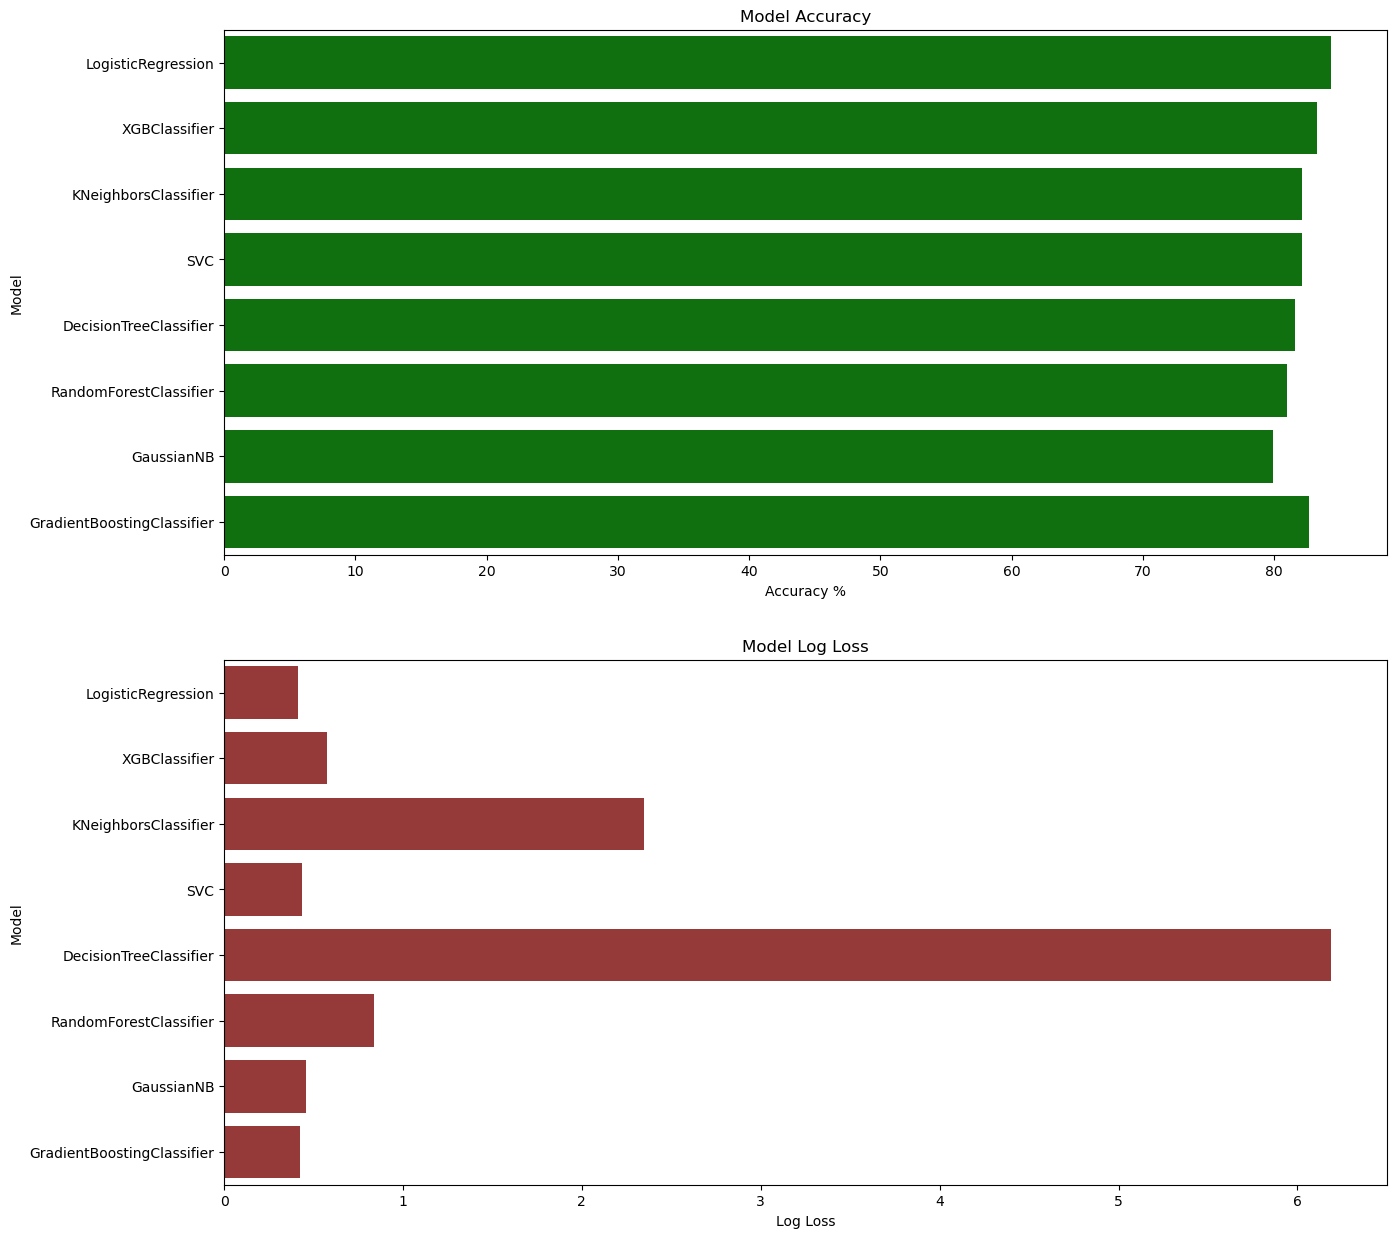

In [393]:
# Visualising the accuracy & Log_loss score of the models
plt.subplots(figsize=(15, 15))

plt.subplot(2,1,1)
sns.barplot(x='Accuracy', y='Model', data=log, color='green')
plt.xlabel('Accuracy %')
plt.title('Model Accuracy', fontdict={'fontsize':12})

plt.subplot(2,1,2)
sns.barplot(x='Log Loss', y='Model', data=log, color='brown')
plt.xlabel('Log Loss')
plt.title('Model Log Loss', fontdict={'fontsize':12})

plt.show()

Log Loss can be interpreted as the measure of the information gain achieved by the model. It quantifies how well the predicted probabilities align with the actual class labels. Smaller Log Loss values indicate better model performance.

Therefore, It is observed that Logistic Regression have better Accuracy and log loss combination than other models.

# iv Training the best performing model with full data and Prediction of Survival Outcome of each passenger with the test data

In [394]:
#Training the model with the whole data
L_reg = LogisticRegression()

L_reg.fit(x,y)

LogisticRegression()

In [395]:
Test_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,NaN,1.0,1.0,0.430039,0.000,0.000000,0.015282,0.5
1,893,NaN,1.0,0.0,0.586622,0.125,0.000000,0.013663,1.0
2,894,NaN,0.5,1.0,0.774521,0.000,0.000000,0.018909,0.5
3,895,NaN,1.0,1.0,0.336089,0.000,0.000000,0.016908,1.0
4,896,NaN,1.0,0.0,0.273456,0.125,0.111111,0.023984,1.0


In [396]:
#Making a copy of the test data to save predictions later
Test_data2=Test_data.copy()

In [397]:
#Removing the PassengerID and Survived column of the test data
X_test= Test_data.drop(["Survived", "PassengerId"], axis=1)

In [398]:
#Predicting the survival outcome of each passenger
Predictions=L_reg.predict(X_test)
Predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

# (v) Removing the other columns of the test data copy and leaving only the passenger and Survived column so as to save the survival outcome predictions for each passenger

In [399]:
Test_data2= Test_data2.drop(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"], axis=1)
Test_data2.head()

,PassengerId,Survived
0,892,NaN
1,893,NaN
2,894,NaN
3,895,NaN
4,896,NaN


In [400]:
#Replacing the survived column with the predictions we got
Test_data2['Survived'] = Predictions

In [401]:
Test_data2

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


# Summary

Having trained all the Eight (8) models,it is observed that the best model that can give better prediction for survival outcome of Titanic Passengers is the Logistic regression model. It has better accuracy and log loss combination compared to other models